# DBSCAN for Outlier Detection

This cell performs outlier detection using the DBSCAN algorithm. It starts by loading the dataset and using the `NearestNeighbors` method to help choose an appropriate `eps` value for DBSCAN. After determining `eps`, it applies DBSCAN to detect and remove outliers, finally saving the cleaned dataset to a new CSV file.


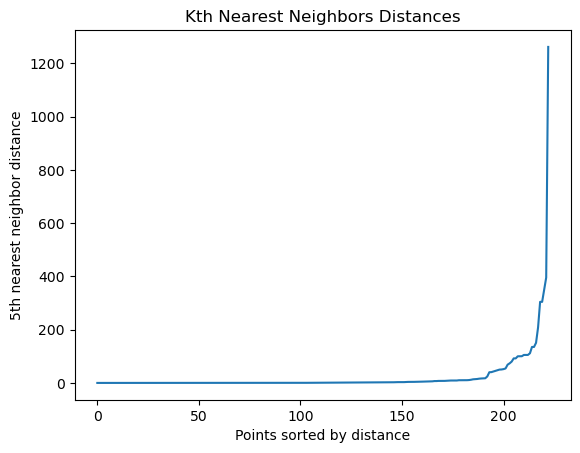

In [92]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data_path = 'processed_data.csv'  # Replace with your file path
data = pd.read_csv(data_path)

# Using NearestNeighbors to find a suitable eps
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(data)
distances, indices = neighbors_fit.kneighbors(data)
distances = np.sort(distances, axis=0)
distances = distances[:,1]

# Plotting the k-nearest neighbors distances to choose eps
plt.plot(distances)
plt.title('Kth Nearest Neighbors Distances')
plt.xlabel('Points sorted by distance')
plt.ylabel('5th nearest neighbor distance')
plt.show()

# DBSCAN for outlier detection
eps_value = 250  # Adjust based on your dataset
dbscan = DBSCAN(eps=eps_value, min_samples=5)
labels = dbscan.fit_predict(data)

# Removing outliers
outliers_mask = labels == -1
data_no_outliers = data[~outliers_mask]

# Save the cleaned data to a new CSV file
data_no_outliers.to_csv('cleaned_data.csv', index=False)


# Plotting and DBSCAN Application

This cell aims to visualize the effect of DBSCAN outlier removal on the dataset. It includes a comparison of the data distribution before and after applying DBSCAN, focusing on two features: 'porosity' and 'Permeability'. It also repeats the DBSCAN application with an `eps_value`, which should be adjusted based on previous steps or domain knowledge.


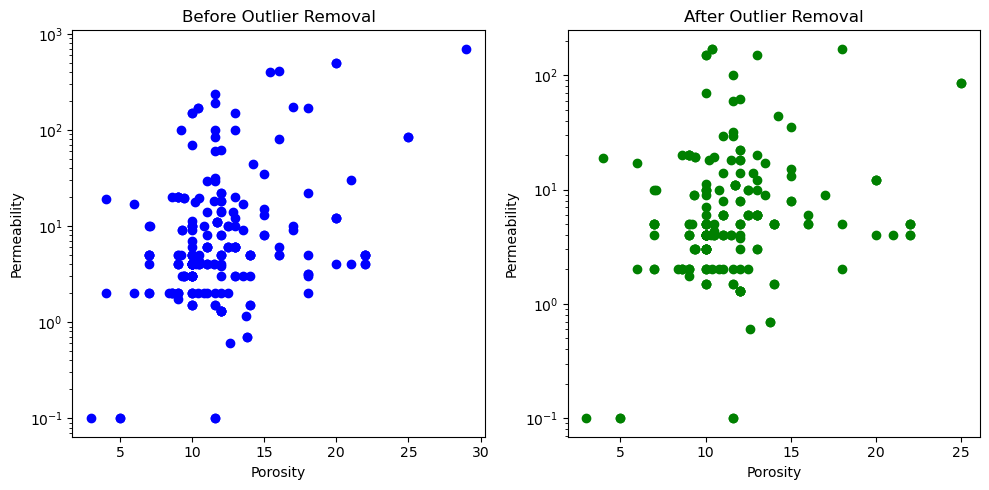

24

In [93]:
# Choosing an eps value based on the plot - this is a bit subjective and might need adjustment
eps_value = 200 # This is a starting point and may need to be adjusted based on domain knowledge or experimentation

# Applying DBSCAN
dbscan = DBSCAN(eps=eps_value, min_samples=5)
labels = dbscan.fit_predict(data)

# Identifying core and outlier points
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
outliers_mask = labels == -1

# Data without outliers
data_no_outliers = data[~outliers_mask]

# Plotting the data after outlier removal
plt.figure(figsize=(10, 5))

# Plot before DBSCAN (repeated for comparison)
plt.subplot(1, 2, 1)
plt.scatter(data['porosity'], data['Permeability'], c='blue', label='Original Data')
plt.title('Before Outlier Removal')
plt.xlabel('Porosity')
plt.ylabel('Permeability')
plt.yscale('log')
# Plot after DBSCAN
plt.subplot(1, 2, 2)
plt.scatter(data_no_outliers['porosity'], data_no_outliers['Permeability'], c='green', label='Data without Outliers')
plt.title('After Outlier Removal')
plt.xlabel('Porosity')
plt.ylabel('Permeability')
plt.yscale('log')
plt.tight_layout()
plt.show()

# Returning the number of outliers detected to provide some context
num_outliers_detected = np.sum(outliers_mask)
num_outliers_detected


C:\Users\Lenovo-x88\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo-x88\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo-x88\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo-x88\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

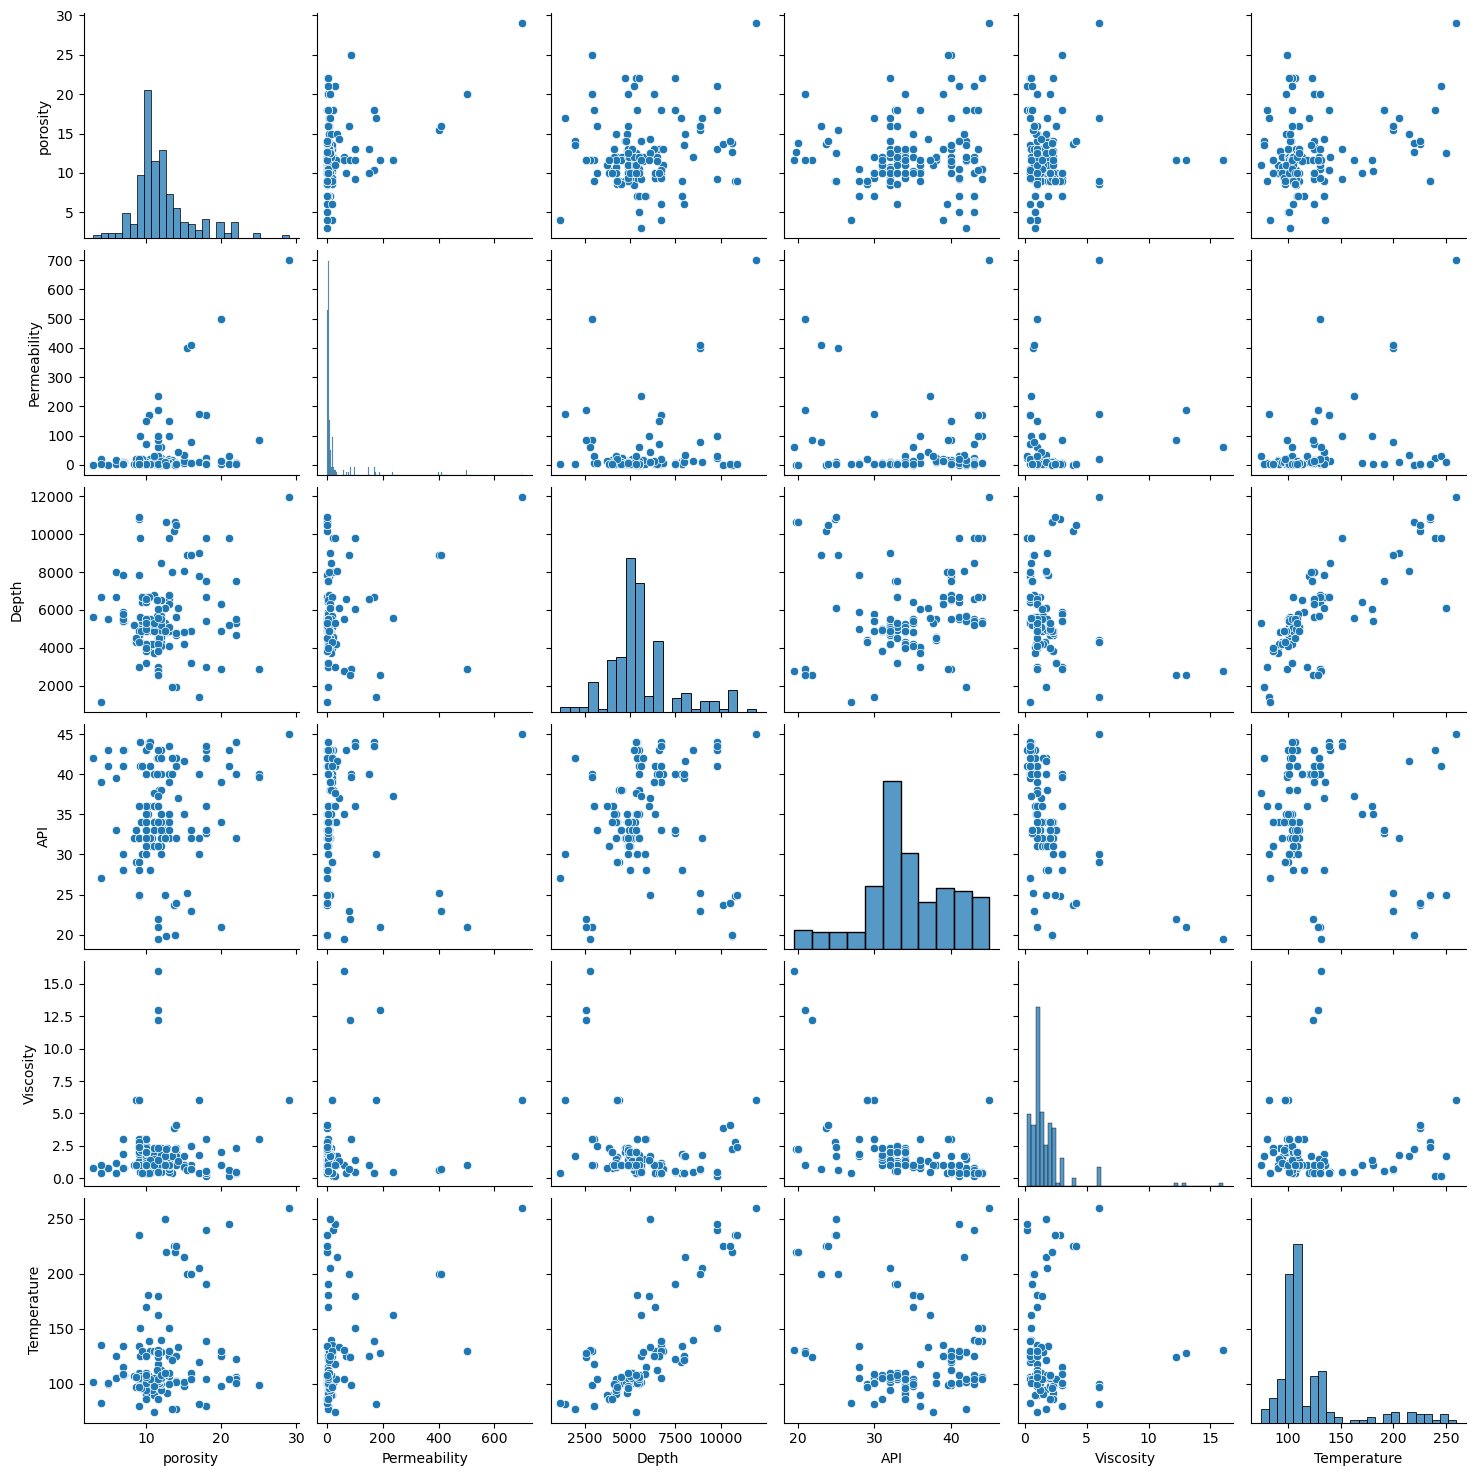

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data_path = 'processed_data.csv'
df = pd.read_csv(data_path)

# Create pair plot
sns.pairplot(df)
plt.show()


C:\Users\Lenovo-x88\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo-x88\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo-x88\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo-x88\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

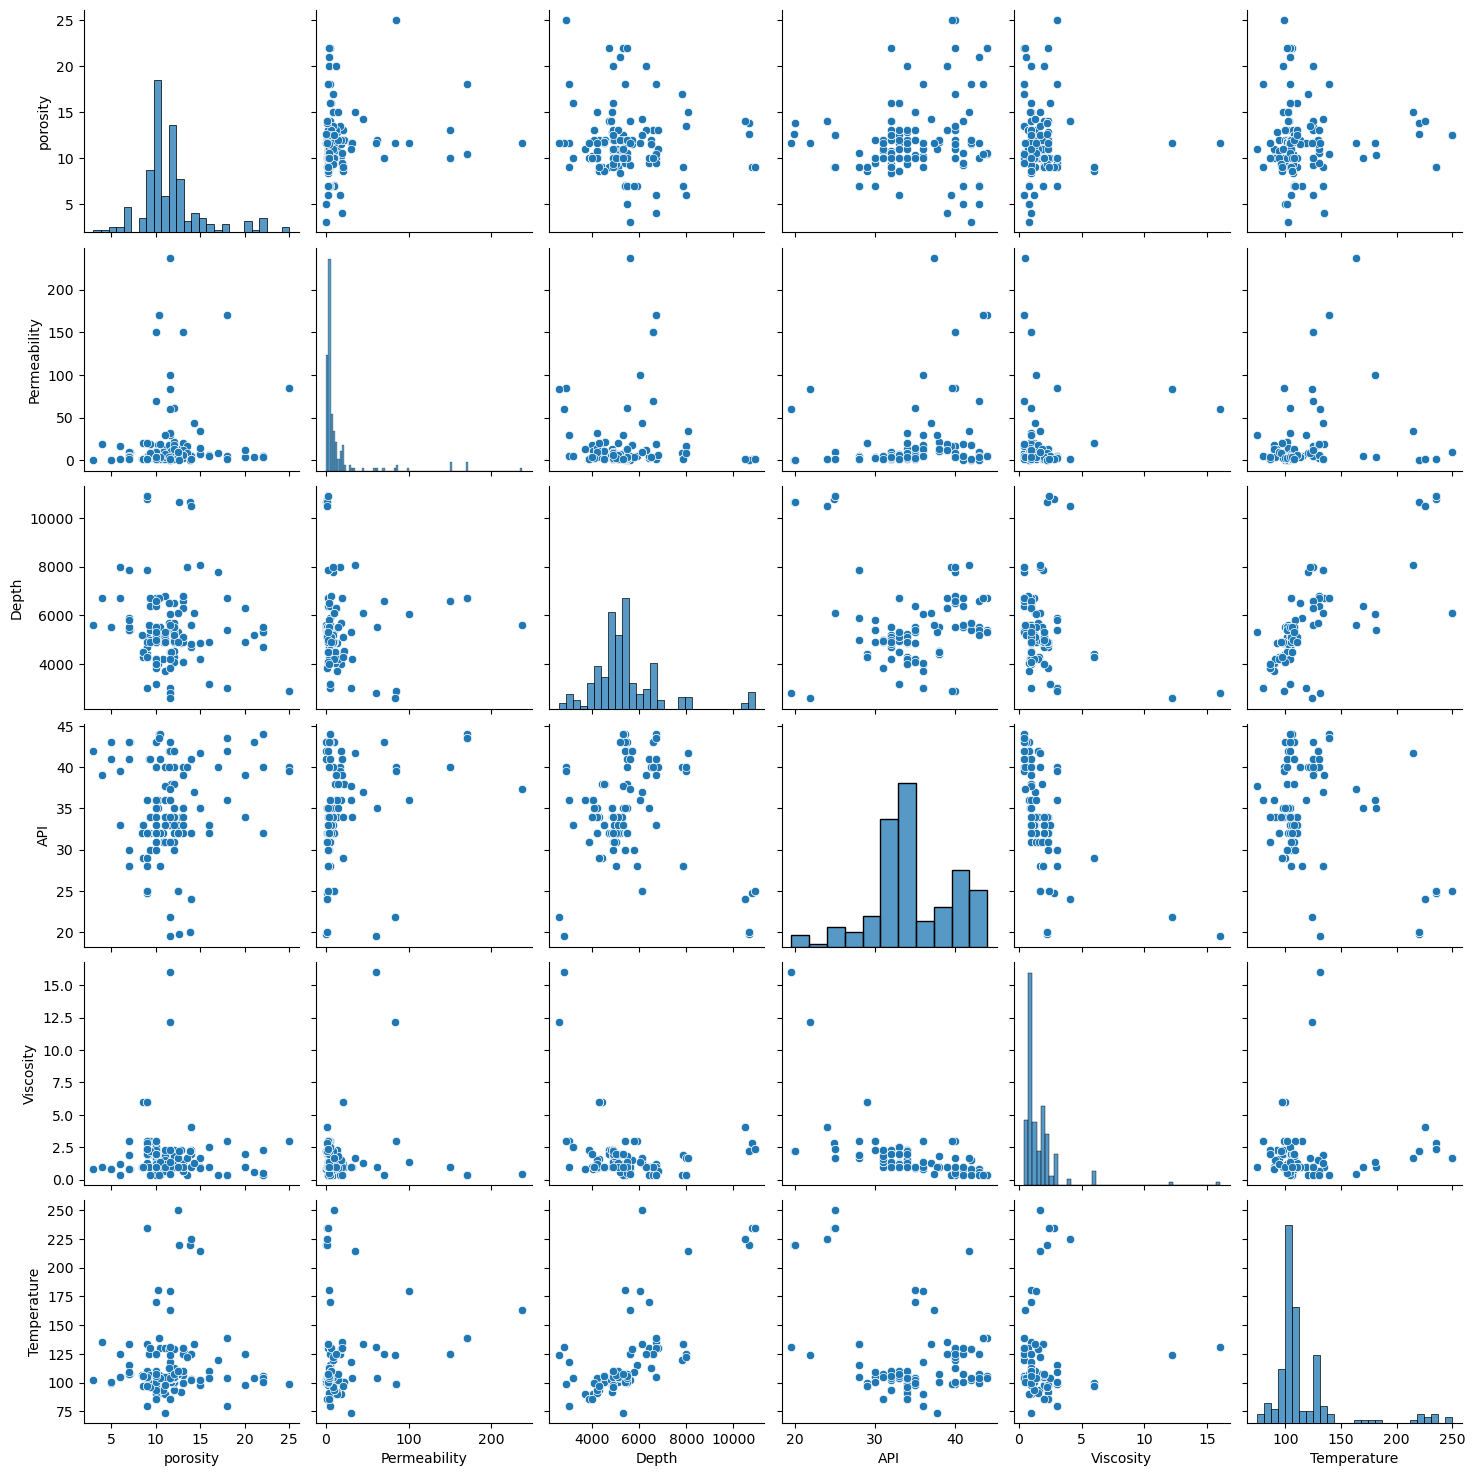

In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data_path = 'cleaned_data.csv'
df = pd.read_csv(data_path)

# Create pair plot
sns.pairplot(df)


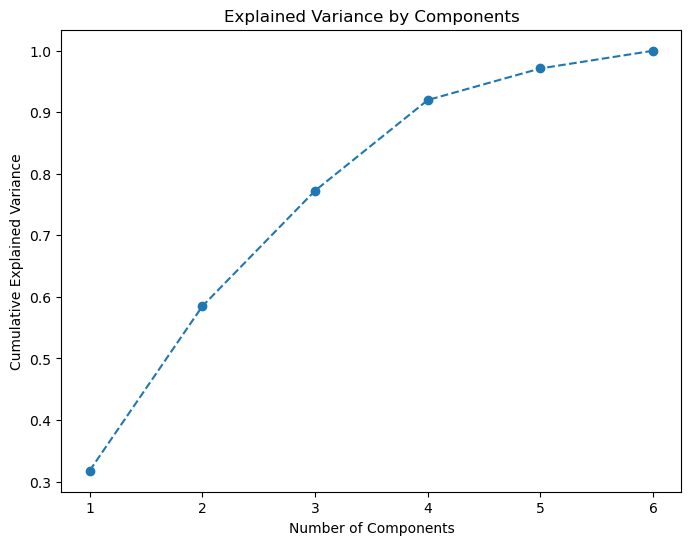

C:\Users\Lenovo-x88\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo-x88\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


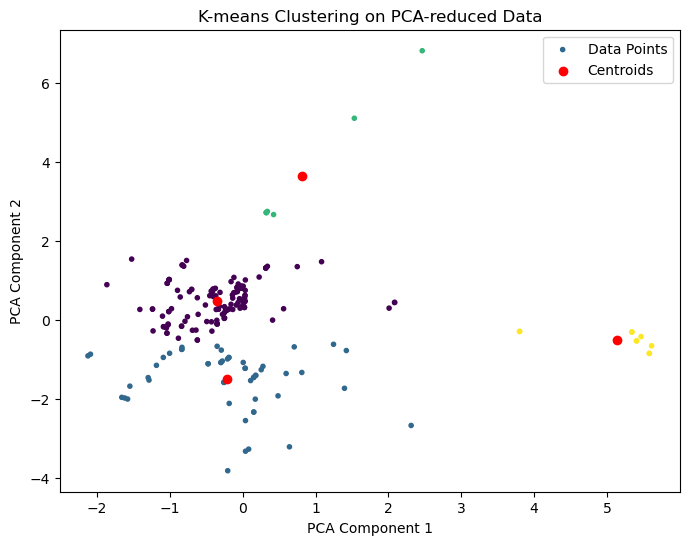

In [96]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# Load the cleaned data
cleaned_data_path = 'cleaned_data.csv'  # Adjust this path
cleaned_data = pd.read_csv(cleaned_data_path)

# Standardizing the features before PCA
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cleaned_data)

# Apply PCA without reducing dimensionality to compute full explained variance
pca_full = PCA()
pca_full.fit(data_scaled)

# Plotting the cumulative explained variance by each component
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca_full.explained_variance_ratio_) + 1), 
         np.cumsum(pca_full.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


# Applying PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# K-means clustering with k=5
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_pca)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plotting the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis', marker='.', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='o', label='Centroids')
plt.title('K-means Clustering on PCA-reduced Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


C:\Users\Lenovo-x88\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo-x88\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo-x88\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo-x88\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by s

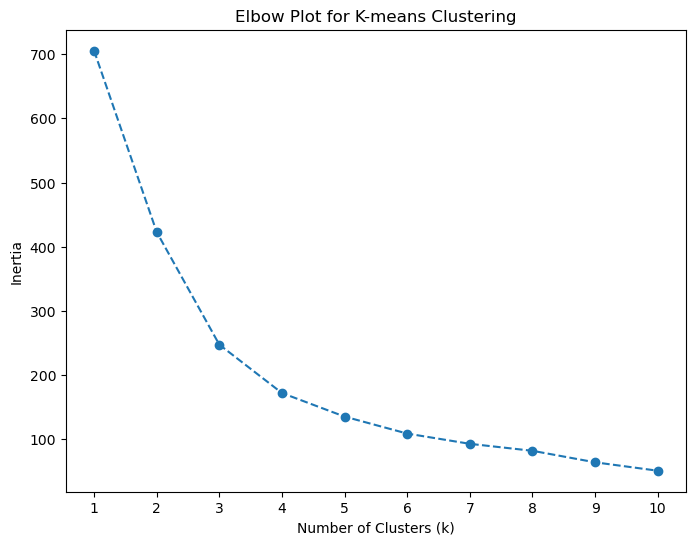

In [97]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Load the cleaned data
cleaned_data_path = 'cleaned_data.csv'  # Adjust this path
cleaned_data = pd.read_csv(cleaned_data_path)

# Standardizing the features before PCA
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cleaned_data)

# Applying PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Calculate the inertia for different values of k
inertia = []
for k in range(1, 11):  # Trying k from 1 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_pca)
    inertia.append(kmeans.inertia_)

# Plot the Elbow plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Plot for K-means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(np.arange(1, 11, 1))  # Adjust x ticks to show integers only
plt.grid(False)
plt.show()


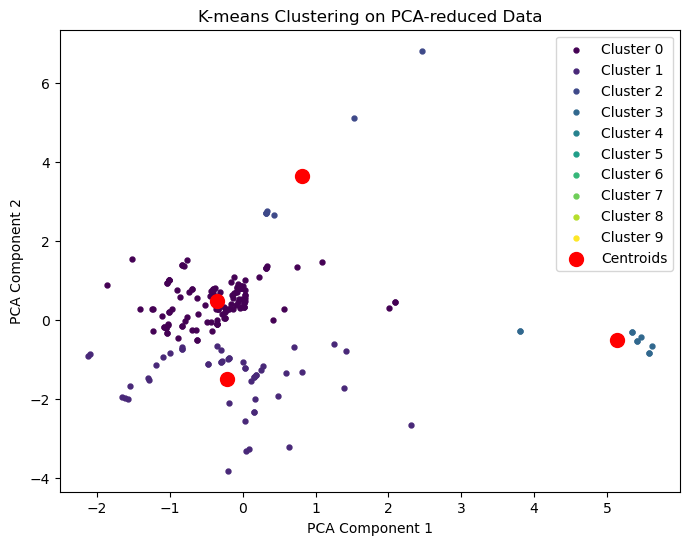

In [98]:
plt.figure(figsize=(8, 6))

# Define colors for each cluster
colors = plt.cm.viridis(np.linspace(0, 1, kmeans.n_clusters))

# Plot each cluster
for i in range(kmeans.n_clusters):
    # Select only data points with the target cluster label
    cluster_data = data_pca[labels == i]
    
    # Plot data points for this cluster
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], s=50, c=[colors[i]], label=f'Cluster {i}', marker='.')
    
# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='o', s=100, label='Centroids')

plt.title('K-means Clustering on PCA-reduced Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Ensure unique legend entries
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.show()


## Summary of K-means Clustering with PCA Visualization

### 1. Load and Prepare Data
- The code loads cleaned data from a CSV file and selects only numeric columns assuming they're ready for analysis.
- Standardizes the numeric data using StandardScaler to make sure all features have the same scale.

### 2. Dimensionality Reduction with PCA
- Utilizes PCA (Principal Component Analysis) to reduce the dimensionality of the data to 2 components for visualization purposes.

### 3. K-means Clustering
- Applies K-means clustering algorithm with `k=4` clusters on the PCA-transformed data.
- Labels each data point with its corresponding cluster.

### 4. Mapping Cluster Labels to Descriptive Labels
- Defines descriptive labels for the clusters, e.g., 'Very Good', 'Moderate', 'Poor', 'Very Poor'.
- Maps the numeric cluster labels obtained from K-means to these descriptive labels.

### 5. Visualization
- Plots the data points colored according to their descriptive cluster labels.
- Also plots centroids of each cluster.
- Each cluster is represented by a different color, and descriptive labels are shown in the legend.

### 6. Interpretation
- The visualization helps in understanding the distribution of data points and how they are grouped into clusters based on similarity.
- Centroids provide insight into the central tendencies of each cluster.
- Descriptive labels make the interpretation easier by providing meaningful names to the clusters.


C:\Users\Lenovo-x88\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo-x88\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


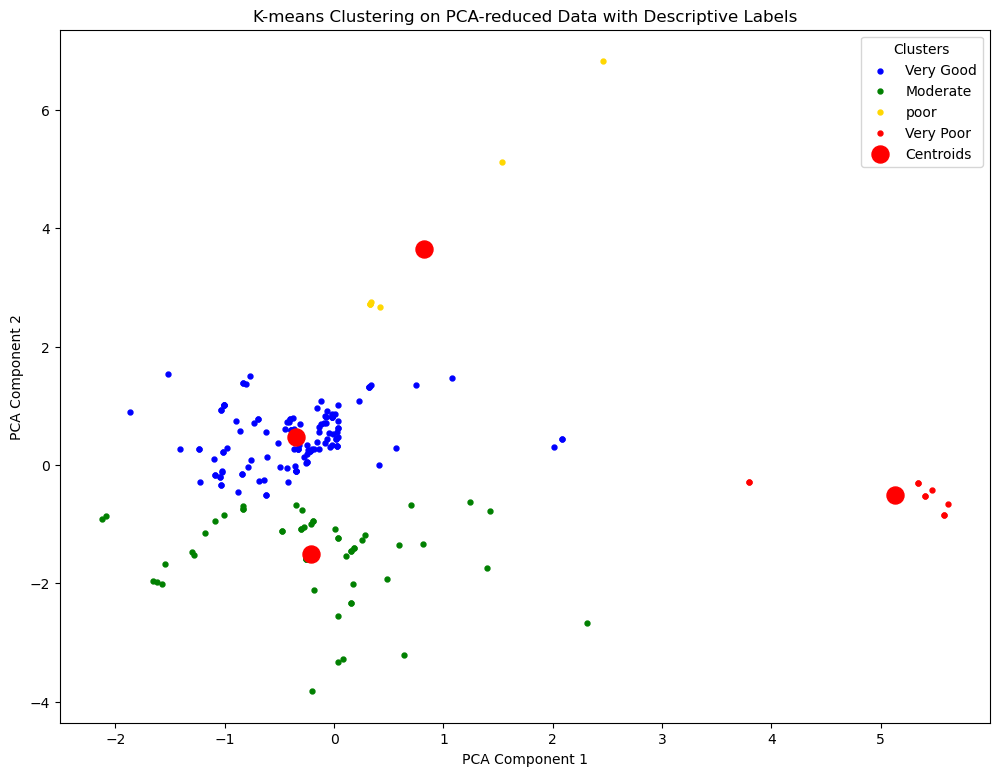

In [99]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the data
cleaned_data_path = 'cleaned_data.csv'  # Adjust this to your file path
cleaned_data = pd.read_csv(cleaned_data_path)

# Assuming the data is ready for analysis, dropping non-numeric columns for PCA
numeric_data = cleaned_data.select_dtypes(include=[np.number])

# Standardizing the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numeric_data)

# Applying PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# K-means clustering with k=5
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_pca)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Map cluster labels to descriptive labels
cluster_labels = {0: 'Very Good', 1: 'Moderate', 2: 'poor', 3: 'Very Poor'}
descriptive_labels = [cluster_labels[label] for label in labels]

# Define colors for each cluster using the descriptive labels
color_map = {'Very Good': 'blue', 'Moderate': 'green', 'poor': 'gold', 'Very Poor': 'red'}
colors = [color_map[label] for label in descriptive_labels]

plt.figure(figsize=(12, 9))

# Plot each cluster with its descriptive label
for i, label in enumerate(cluster_labels.values()):
    cluster_data = data_pca[labels == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], s=50, c=color_map[label], label=label, marker='.')

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='o', s=150, label='Centroids')

plt.title('K-means Clustering on PCA-reduced Data with Descriptive Labels')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title="Clusters", bbox_to_anchor=(1, 1))

plt.show()


In [100]:
# Here, use 'kmeans.labels_' directly to ensure correct label assignment
cleaned_data['Cluster_Label'] = kmeans.labels_

# Convert the 'Cluster_Label' column to integers
cleaned_data['Cluster_Label'] = cleaned_data['Cluster_Label'].astype(int)

# Saving this new dataframe with cluster labels to a new CSV file
clustered_data_path = 'cleaned_data_with_labels_new.csv'
cleaned_data.to_csv(clustered_data_path, index=False)

# Return the path for download
print(clustered_data_path)


cleaned_data_with_labels_new.csv


In [101]:
# Define the cluster labels mapping
cluster_labels_mapping = {0: 'Good', 1: 'very good', 2: 'Moderate', 3: 'Poor'}

# Identify the columns corresponding to cluster labels
cluster_label_columns = ['Cluster_Label']  # Adjust this list based on your column names

# Convert the identified columns to text
for column in cluster_label_columns:
    cleaned_data[column] = cleaned_data[column].map(cluster_labels_mapping).astype(str)

# Saving the DataFrame with identified columns treated as text to a new CSV file
clustered_data_path = 'cleaned_data_with_labels_new11.csv'
cleaned_data.to_csv(clustered_data_path, index=False)

# Return the path for download
print(clustered_data_path)


cleaned_data_with_labels_new11.csv


C:\Users\Lenovo-x88\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo-x88\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo-x88\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo-x88\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

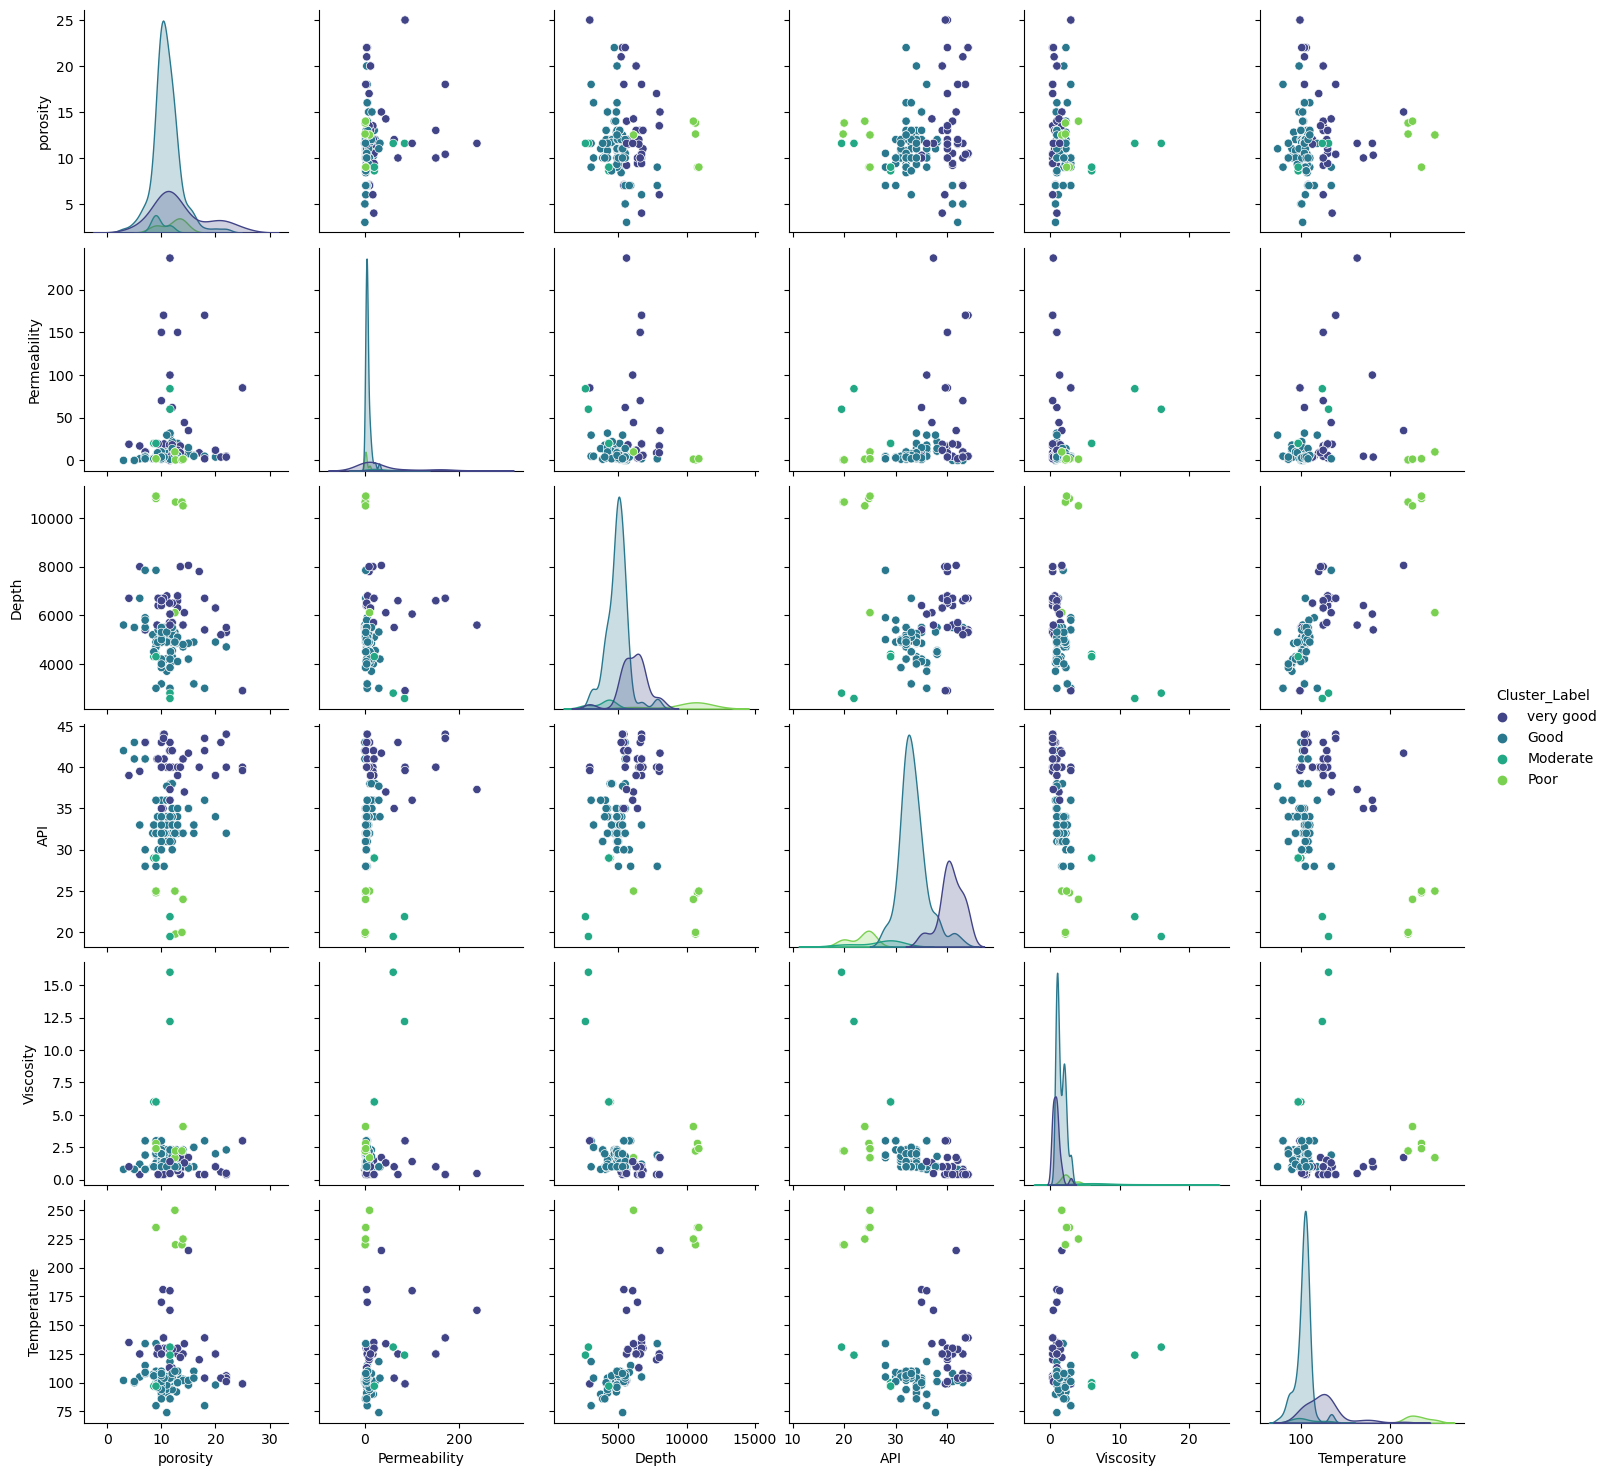

In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("cleaned_data_with_labels_new11.csv")

# Define the columns for which you want to create the pair plot
columns_for_pairplot = data.columns.drop('Cluster_Label')

# Define the column to use for coloring
cluster_label_column = 'Cluster_Label'

# Create the pair plot
sns.pairplot(data=data, vars=columns_for_pairplot, hue=cluster_label_column, palette='viridis')
plt.show()


In [103]:
import pandas as pd

# Assuming you've already loaded your data into a DataFrame data
# and computed cluster_summary_stats and cluster_counts
data_path = 'cleaned_data_with_labels_new.csv'  # Replace with your file path
data = pd.read_csv(data_path)

# Define cluster_summary_stats and cluster_counts
# For example:
cluster_summary_stats = data.groupby('Cluster_Label').describe()
cluster_counts = data['Cluster_Label'].value_counts()

# Flatten the multi-level columns by joining level 0 (the original column names)
# with level 1 (the aggregation functions), using an underscore or another separator.
cluster_summary_stats.columns = ['_'.join(col).strip() for col in cluster_summary_stats.columns.values]

# Now that cluster_summary_stats has single-level columns, you can join it with cluster_counts
cluster_summary = cluster_summary_stats.join(cluster_counts.rename('Count'))

# Create a DataFrame containing the summary statistics
summary_statistics = pd.DataFrame({
    'Mean': cluster_summary.mean(),
    'Standard Deviation': cluster_summary.std(),
    'Minimum': cluster_summary.min(),
    'Maximum': cluster_summary.max()
})

# Write the summary statistics DataFrame to a CSV file named "summary.csv"
summary_statistics.to_csv('summary.csv')

# Display the summary statistics DataFrame
print(data.columns)


Index(['porosity', 'Permeability', 'Depth', 'API', 'Viscosity', 'Temperature',
       'Cluster_Label'],
      dtype='object')


## Spliting Dtat to train and test

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data_path = 'cleaned_data_with_labels_new.csv'  # Replace with your file path
data = pd.read_csv(data_path)

# Selecting the specified features and the target variable
X = data[["porosity", "Permeability", "Depth", "API", "Viscosity", "Temperature"]]
y = data["Cluster_Label"]

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizing the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape


((140, 6), (61, 6), (140,), (61,))

## Applaying KNN
- Confusion Matrix- Classification Report


In [105]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # Starting with k=5
knn.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the evaluation results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.9672131147540983
Confusion Matrix:
 [[42  0  0  0]
 [ 2 14  0  0]
 [ 0  0  1  0]
 [ 0  0  0  2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        42
           1       1.00      0.88      0.93        16
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         2

    accuracy                           0.97        61
   macro avg       0.99      0.97      0.98        61
weighted avg       0.97      0.97      0.97        61



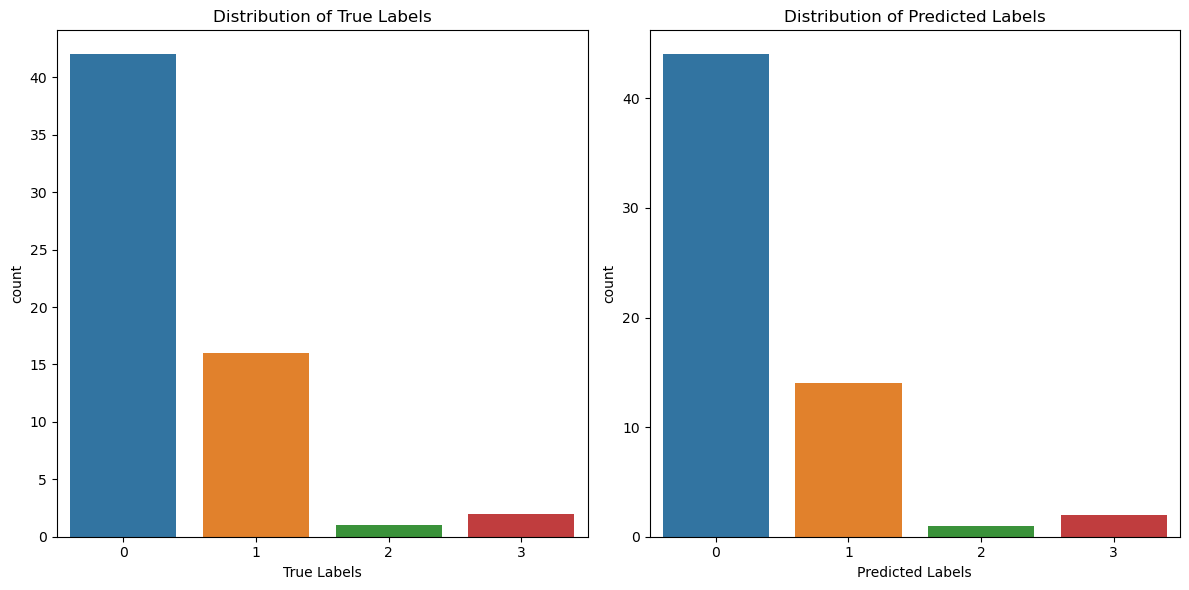

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'y_pred' is defined elsewhere in your code
# Create a DataFrame with true and predicted labels
results_df = pd.DataFrame({'True Labels': y_test, 'Predicted Labels': y_pred})

# Plotting the distribution of true vs. predicted labels
plt.figure(figsize=(12, 6))

# True Labels
plt.subplot(1, 2, 1)
sns.countplot(x='True Labels', data=results_df)
plt.title('Distribution of True Labels')

# Predicted Labels
plt.subplot(1, 2, 2)
sns.countplot(x='Predicted Labels', data=results_df)
plt.title('Distribution of Predicted Labels')

plt.tight_layout()
plt.show()


## KNeighborsClassifier

- PCA is utilized to reduce the dimensionality of the data to two components.
- KNN classifier is then trained on the PCA-transformed data.
- A function is defined to visualize the decision boundaries of KNN on 2D data, aiding in the interpretation of the classification results.


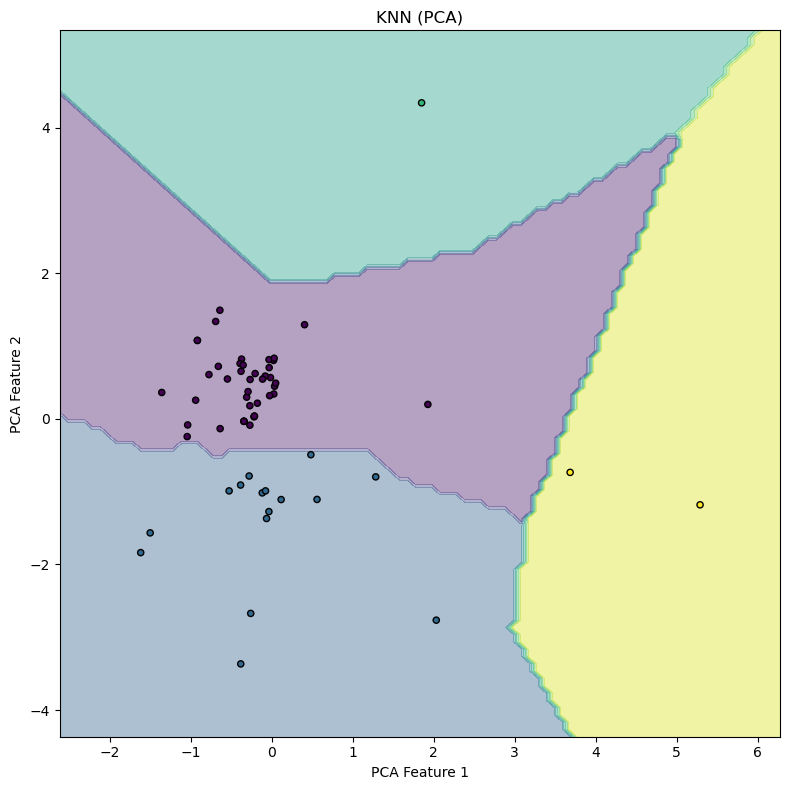

In [107]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming X_train_scaled, X_test_scaled, and y_train are already defined and scaled appropriately

# Define and train the PCA model to reduce dimensionality
pca_model = PCA(n_components=2)
X_train_pca = pca_model.fit_transform(X_train_scaled)
X_test_pca = pca_model.transform(X_test_scaled)

# Train a KNN model on the PCA-transformed data
knn_pca = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors (k) as needed
knn_pca.fit(X_train_pca, y_train)

# Function to plot decision boundaries for 2D data
def plot_decision_boundary_knn(X, y, model, title):
    # Define the canvas
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to plot
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.title(title)
    plt.xlabel('PCA Feature 1')
    plt.ylabel('PCA Feature 2')

plt.figure(figsize=(8, 8))

# Plot decision boundary for KNN
plot_decision_boundary_knn(X_test_pca, y_test, knn_pca, "KNN (PCA)")

plt.tight_layout()
plt.show()


# Logistic Regression and Random Forest Model Fitting
### Machine Learning Pipeline Summary

#### 1. Importing Libraries
   - Necessary modules from scikit-learn for data preprocessing, model training, and evaluation are imported.

#### 2. Preprocessing
   - Features and target variable are selected from the dataset.
   - Features selected: "porosity," "Permeability," "Depth," "API," "Viscosity," and "Temperature."

#### 3. Initializing Models
   - Two classification models are initialized:
     - Logistic Regression
     - Random Forest Classifier

#### 4. Training Models
   - Models are trained using the training data.

#### 5. Making Predictions
   - Trained models are used to make predictions on the test data.

#### 6. Evaluation
   - **Accuracy Score:** Compute accuracy of each model.
   - **Confusion Matrix:** Generate confusion matrices for both models.
   - **Classification Report:** Generate classification reports including precision, recall, F1-score, and support for each class.


In [108]:
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset


# Selecting the specified features and the target variable
X = data[["porosity", "Permeability", "Depth", "API", "Viscosity", "Temperature"]]
y = data["Cluster_Label"]

# Initialize and train models
log_reg = LogisticRegression(max_iter=1000).fit(X_train_scaled, y_train)
random_forest = RandomForestClassifier().fit(X_train_scaled, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_rf = random_forest.predict(X_test_scaled)

# Evaluation
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
report_log_reg = classification_report(y_test, y_pred_log_reg)
report_rf = classification_report(y_test, y_pred_rf)


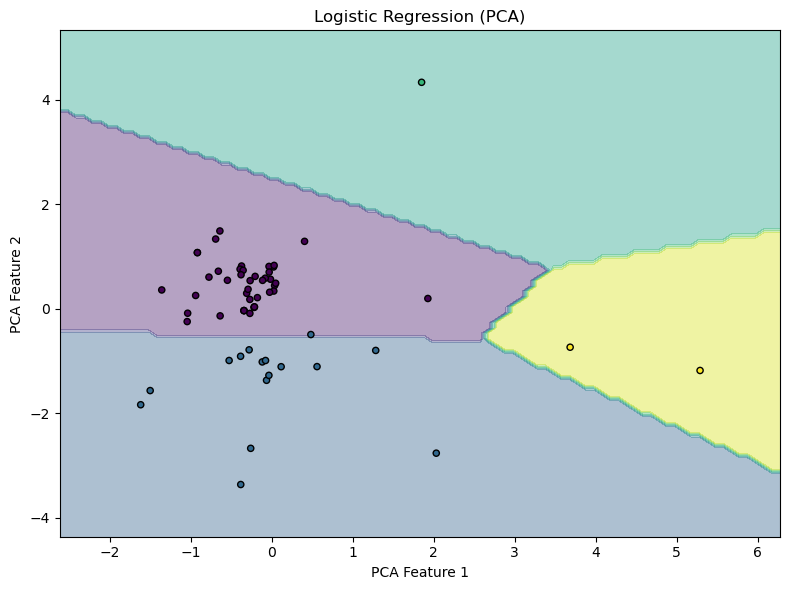

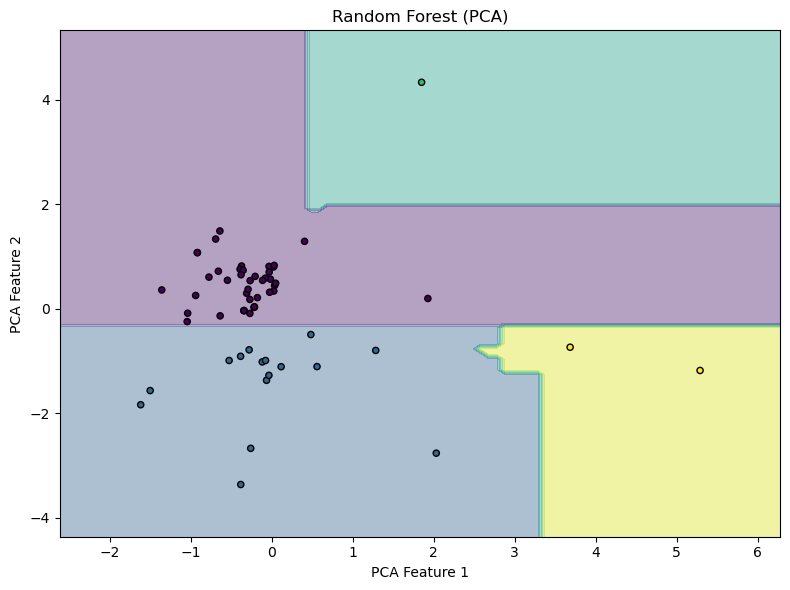

In [109]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Define and train the PCA model
pca_model = PCA(n_components=2)  # Assuming you want to reduce the dimensionality to 2
X_train_pca = pca_model.fit_transform(X_train_scaled)
X_test_pca = pca_model.transform(X_test_scaled)
# Assuming you have trained a Random Forest model named random_forest_pca on the PCA-transformed data
random_forest_pca = RandomForestClassifier().fit(X_train_pca, y_train)


# Assuming you have trained a PCA model named pca_model and transformed the test data using it
X_test_pca = pca_model.transform(X_test_scaled)

# Assuming you have trained a Logistic Regression model named log_reg_pca on the PCA-transformed data
log_reg_pca = LogisticRegression(max_iter=1000).fit(X_train_pca, y_train)

# Function to plot decision boundaries for 2D data
def plot_decision_boundary(X, y, model, title):
    # Define the canvas
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to plot
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.title(title)
    plt.xlabel('PCA Feature 1')
    plt.ylabel('PCA Feature 2')

# Plot decision boundary for Logistic Regression
plt.figure(figsize=(8, 6))  # Create a new figure for Logistic Regression
plot_decision_boundary(X_test_pca, y_test, log_reg_pca, "Logistic Regression (PCA)")
plt.tight_layout()
plt.show()

# Plot decision boundary for Random Forest
plt.figure(figsize=(8, 6))  # Create a new figure for Random Forest
plot_decision_boundary(X_test_pca, y_test, random_forest_pca, "Random Forest (PCA)")
plt.tight_layout()
plt.show()



## Evaluation Metrics for Classification Models

### 1. Making Predictions
   - Predictions are made using Logistic Regression and Random Forest models trained on PCA-transformed data.

### 2. Accuracy Calculation
   - Accuracy scores are computed for both Logistic Regression and Random Forest models.

### 3. Confusion Matrix
   - Confusion matrices are computed for both models to evaluate the performance across different classes.

### 4. Classification Report
   - Classification reports are generated for both Logistic Regression and Random Forest models, providing detailed metrics such as precision, recall, F1-score, and support for each class.

### 5. Receiver Operating Characteristic (ROC) Curve
   - Binarized labels are computed for ROC curve calculation.
   - Predicted probabilities are obtained from the Logistic Regression model.
   - Micro-average ROC curve and ROC area under the curve (AUC) are computed and plotted for the Logistic Regression model on PCA-transformed data.



Accuracy (Logistic Regression): 0.9836065573770492
Accuracy (Random Forest): 1.0
Confusion Matrix (Logistic Regression):
 [[42  0  0  0]
 [ 1 15  0  0]
 [ 0  0  1  0]
 [ 0  0  0  2]]
Confusion Matrix (Random Forest):
 [[42  0  0  0]
 [ 0 16  0  0]
 [ 0  0  1  0]
 [ 0  0  0  2]]
Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        42
           1       1.00      0.94      0.97        16
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         2

    accuracy                           0.98        61
   macro avg       0.99      0.98      0.99        61
weighted avg       0.98      0.98      0.98        61

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        16
           2       1.00      1.00    

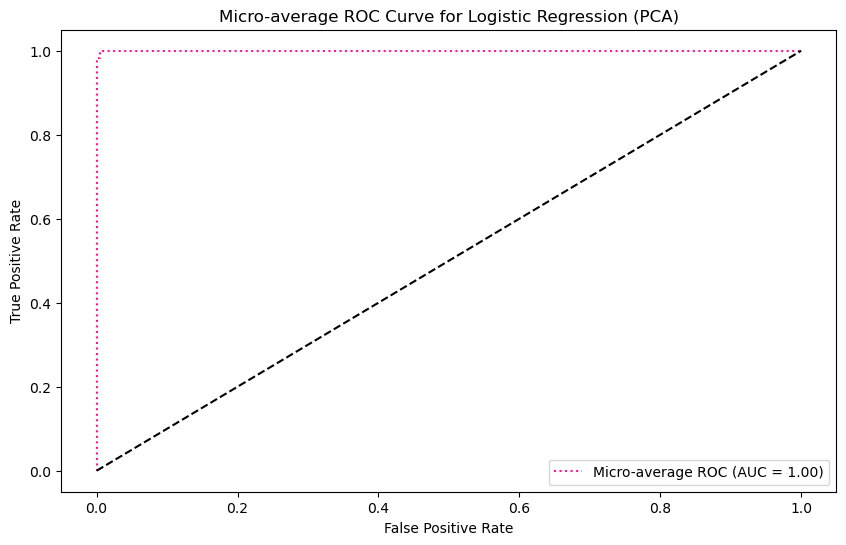

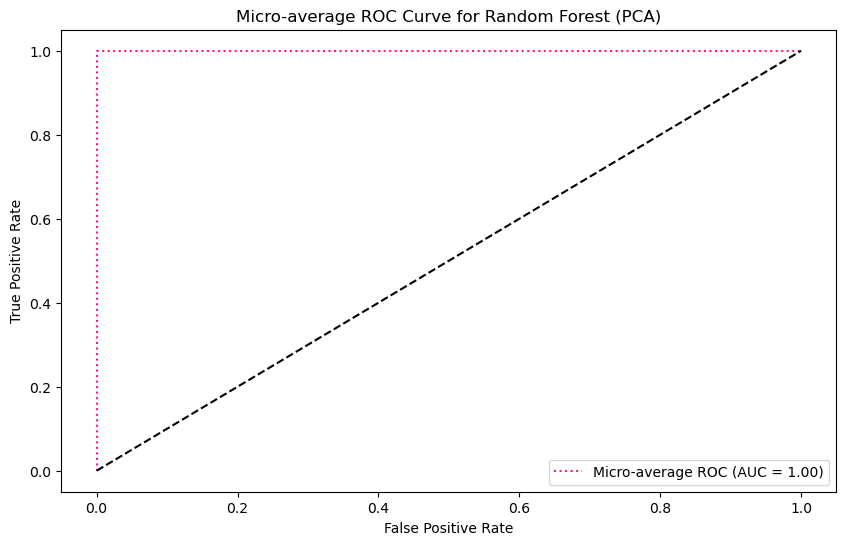

In [110]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions
y_pred_log_reg = log_reg_pca.predict(X_test_pca)
y_pred_random_forest = random_forest_pca.predict(X_test_pca)

# Compute accuracy
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)

print("Accuracy (Logistic Regression):", accuracy_log_reg)
print("Accuracy (Random Forest):", accuracy_random_forest)

# Compute confusion matrix
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
conf_matrix_random_forest = confusion_matrix(y_test, y_pred_random_forest)

print("Confusion Matrix (Logistic Regression):\n", conf_matrix_log_reg)
print("Confusion Matrix (Random Forest):\n", conf_matrix_random_forest)

# Classification report
print("Classification Report (Logistic Regression):\n", classification_report(y_test, y_pred_log_reg))
print("Classification Report (Random Forest):\n", classification_report(y_test, y_pred_random_forest))
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Compute the predicted probabilities for each class
y_pred_prob_log_reg = log_reg_pca.predict_proba(X_test_pca)

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_test_binarized.ravel(), y_pred_prob_log_reg.ravel())
roc_auc_micro = roc_auc_score(y_test_binarized, y_pred_prob_log_reg, average="micro")

# Plot the micro-average ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_micro, tpr_micro, label=f'Micro-average ROC (AUC = {roc_auc_micro:.2f})', color='deeppink', linestyle=':')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-average ROC Curve for Logistic Regression (PCA)')
plt.legend()
plt.show()

from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train_pca, y_train)

# Compute predicted probabilities for each class
y_pred_prob_rf = rf.predict_proba(X_test_pca)

# Compute micro-average ROC curve and ROC area
fpr_rf_micro, tpr_rf_micro, _ = roc_curve(y_test_binarized.ravel(), y_pred_prob_rf.ravel())
roc_auc_rf_micro = roc_auc_score(y_test_binarized, y_pred_prob_rf, average="micro")

# Plot the micro-average ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf_micro, tpr_rf_micro, label=f'Micro-average ROC (AUC = {roc_auc_rf_micro:.2f})', color='deeppink', linestyle=':')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-average ROC Curve for Random Forest (PCA)')
plt.legend()
plt.show()





## Support Vector Classifier (SVC) with PCA Visualization

### 1. Libraries
   - Importing necessary libraries including scikit-learn modules for Support Vector Classifier (SVC), data manipulation, visualization, and PCA.

### 2. Dimensionality Reduction with PCA
   - Defining a PCA model to reduce dimensionality to 2 components.
   - Transforming training and test data using the PCA model.

### 3. Model Training
   - Training an SVC model with a linear kernel on the PCA-transformed training data.

### 4. Decision Boundary Visualization
   - Defining a function `plot_decision_boundary_svc` to visualize decision boundaries for 2D data with SVC.
   - Plotting decision boundaries for the SVC model on PCA-transformed test data.

### 5. Visualization
   - Creating a figure to display the decision boundary plot.
   - Displaying the decision boundary plot for the SVC model on PCA-transformed data.



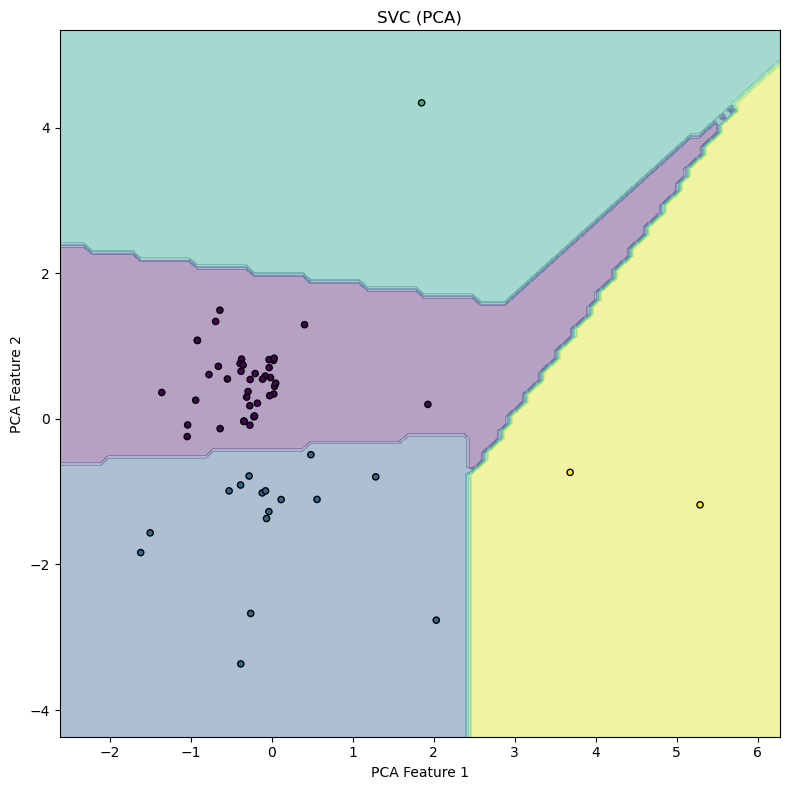

In [111]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming X_train_scaled and X_test_scaled are already defined and scaled appropriately

# Define and train the PCA model to reduce dimensionality
pca_model = PCA(n_components=2)
X_train_pca = pca_model.fit_transform(X_train_scaled)
X_test_pca = pca_model.transform(X_test_scaled)

# Train an SVC model on the PCA-transformed data
svc_pca = SVC(kernel='linear', probability=True).fit(X_train_pca, y_train)

# Function to plot decision boundaries for 2D data
def plot_decision_boundary_svc(X, y, model, title):
    # Define the canvas
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to plot
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.title(title)
    plt.xlabel('PCA Feature 1')
    plt.ylabel('PCA Feature 2')

plt.figure(figsize=(8, 8))

# Plot decision boundary for SVC
plot_decision_boundary_svc(X_test_pca, y_test, svc_pca, "SVC (PCA)")

plt.tight_layout()
plt.show()


In [112]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming your data is loaded and preprocessed
# X_train, X_test, y_train, y_test are available

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVC model
svc_model = SVC(kernel='linear', probability=True)
svc_model.fit(X_train_scaled, y_train)

# Evaluate SVC model
y_pred = svc_model.predict(X_test_scaled)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Compute classification report
class_report = classification_report(y_test, y_pred)

# Display the evaluation results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 1.0
Confusion Matrix:
 [[42  0  0  0]
 [ 0 16  0  0]
 [ 0  0  1  0]
 [ 0  0  0  2]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         2

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61



## DecisionTreeClassifier

`DecisionTreeClassifier` is a classification algorithm used in machine learning. It constructs a tree-like model where each internal node represents a decision based on a feature, and each leaf node represents the class label. The algorithm recursively splits the data based on features to maximize information gain or minimize impurity. It's easy to understand and interpret, but prone to overfitting. Commonly used in various domains for classification tasks.


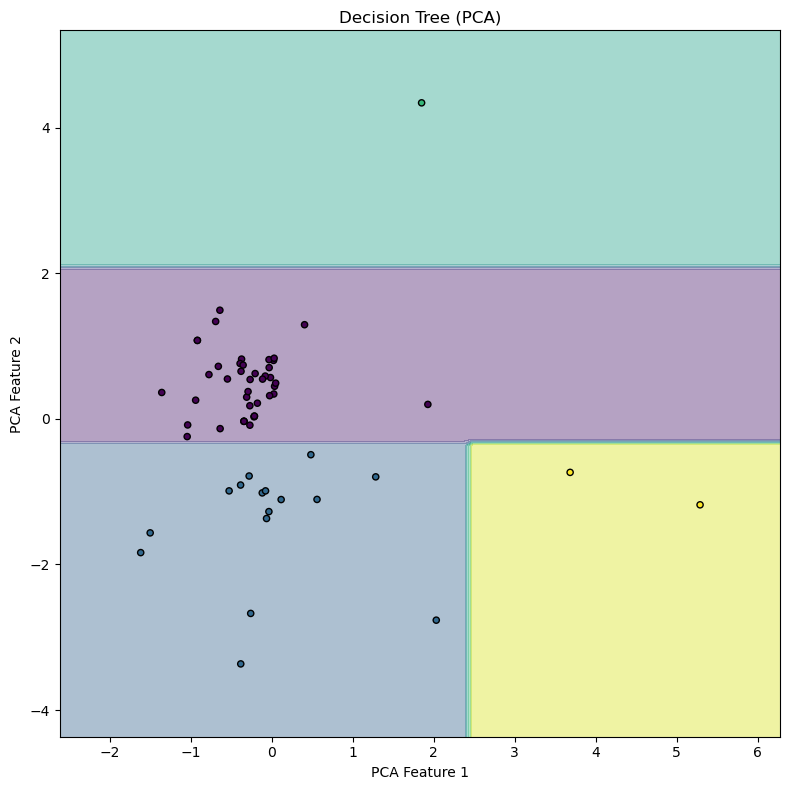

In [113]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming X_train_scaled, X_test_scaled, and y_train are already defined and scaled appropriately

# Define and train the PCA model to reduce dimensionality
pca_model = PCA(n_components=2)
X_train_pca = pca_model.fit_transform(X_train_scaled)
X_test_pca = pca_model.transform(X_test_scaled)

# Train a Decision Tree model on the PCA-transformed data
decision_tree_pca = DecisionTreeClassifier().fit(X_train_pca, y_train)

# Function to plot decision boundaries for 2D data
def plot_decision_boundary_dt(X, y, model, title):
    # Define the canvas
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to plot
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.title(title)
    plt.xlabel('PCA Feature 1')
    plt.ylabel('PCA Feature 2')

plt.figure(figsize=(8, 8))

# Plot decision boundary for Decision Tree
plot_decision_boundary_dt(X_test_pca, y_test, decision_tree_pca, "Decision Tree (PCA)")

plt.tight_layout()
plt.show()


In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def train_dt(X_train, y_train):
    """
    Train Decision Tree classifier.
    
    Parameters:
        X_train (array-like): Training feature matrix.
        y_train (array-like): Training labels.
        
    Returns:
        DecisionTreeClassifier: Trained Decision Tree model.
    """
    dt_model = DecisionTreeClassifier()
    dt_model.fit(X_train, y_train)
    return dt_model

def evaluate_dt(dt_model, X_test, y_test):
    """
    Evaluate Decision Tree classifier.
    
    Parameters:
        dt_model (DecisionTreeClassifier): Trained Decision Tree model.
        X_test (array-like): Test feature matrix.
        y_test (array-like): Test labels.
        
    Returns:
        accuracy (float): Accuracy of the model.
        conf_matrix (array): Confusion matrix.
        class_report (str): Classification report.
    """
    y_pred = dt_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    return accuracy, conf_matrix, class_report


In [115]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming your data is loaded and preprocessed
# X_train, X_test, y_train, y_test are available

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Decision Tree model
dt_model = train_dt(X_train_scaled, y_train)

# Evaluate Decision Tree model
accuracy, conf_matrix, class_report = evaluate_dt(dt_model, X_test_scaled, y_test)

# Display the evaluation results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.9672131147540983
Confusion Matrix:
 [[42  0  0  0]
 [ 2 14  0  0]
 [ 0  0  1  0]
 [ 0  0  0  2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        42
           1       1.00      0.88      0.93        16
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         2

    accuracy                           0.97        61
   macro avg       0.99      0.97      0.98        61
weighted avg       0.97      0.97      0.97        61



In [116]:
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

# Load input CSV
input_file = 'cleaned_data_with_labels_new11.csv'
input_data = pd.read_csv(input_file)
features = ["porosity", "Permeability", "Depth", "API", "Viscosity", "Temperature"]
target = input_data['Cluster_Label']  # Replace 'target_column' with the name of your target column

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', DecisionTreeClassifier())
])

# Define k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(pipeline, input_data[features], target, cv=kfold, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())


Cross-Validation Scores: [0.95121951 0.975      0.975      0.95       0.9       ]
Mean Accuracy: 0.9502439024390246


## Maching the moding with Recovry Factor

In [117]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load input CSV
input_file = 'Clean_data.csv'
input_data = pd.read_csv(input_file)
features = ["porosity", "Permeability", "Depth", "API", "Viscosity", "Temperature"]

# Assuming 'scaler' and 'pca_model' are already defined elsewhere in your code
# Preprocess and scale input data
scaler = StandardScaler()
input_features = input_data[features]
input_scaled = scaler.fit_transform(input_features)

# Transform input data using PCA
pca_model = PCA(n_components=2)
input_pca = pca_model.fit_transform(input_scaled)

# Predict labels using the trained models
predicted_labels_log_reg = log_reg_pca.predict(input_pca)
predicted_labels_random_forest = random_forest_pca.predict(input_pca)
predicted_labels_decision_tree = decision_tree_pca.predict(input_pca)  # Assuming 'decision_tree_pca' is the trained Decision Tree model
predicted_labels_knn = knn_pca.predict(input_pca)  # Assuming 'knn_pca' is the trained KNN model
predicted_labels_svc = svc_pca.predict(input_pca)  # Assuming 'svc_pca' is the trained SVC model

# Define the cluster labels mapping
labels_mapping = {0: 'Very Good', 1: 'Moderate', 2: 'Poor', 3: 'Very Poor'}

# Map numerical labels to string representations
predicted_labels_log_reg_mapped = [labels_mapping[label] for label in predicted_labels_log_reg]
predicted_labels_random_forest_mapped = [labels_mapping[label] for label in predicted_labels_random_forest]
predicted_labels_decision_tree_mapped = [labels_mapping[label] for label in predicted_labels_decision_tree]
predicted_labels_knn_mapped = [labels_mapping[label] for label in predicted_labels_knn]
predicted_labels_svc_mapped = [labels_mapping[label] for label in predicted_labels_svc]

# Add predicted labels to the input data
input_data['Predicted_Labels_Log_Reg'] = predicted_labels_log_reg_mapped
input_data['Predicted_Labels_Random_Forest'] = predicted_labels_random_forest_mapped
input_data['Predicted_Labels_Decision_Tree'] = predicted_labels_decision_tree_mapped
input_data['Predicted_Labels_KNN'] = predicted_labels_knn_mapped
input_data['Predicted_Labels_SVC'] = predicted_labels_svc_mapped

# Save the input data with predicted labels to a new CSV file
output_file = 'predicted_labels.csv'
input_data.to_csv(output_file, index=False)

print("Predictions saved to:", output_file)


Predictions saved to: predicted_labels.csv


## Summary of EOR CO2 Injection Predictive Analysis Iraqi Reservoirs 

### 1. Data Preprocessing
- **Libraries Used:** `pandas`, `StandardScaler` from `sklearn.preprocessing`, `PCA` from `sklearn.decomposition`.
- **Input Data:** Loaded from CSV file (`Iraqi Reservoirs Screen.csv`).
- **Selected Features:** ["porosity", "Permeability", "Depth", "API", "Viscosity", "Temperature"].
- **Scaling:** Features are scaled using `StandardScaler`.

### 2. Principal Component Analysis (PCA)
- **PCA Model:** Initialized with `n_components=2`.
- **Transform:** Scaled input data transformed into principal components.

### 3. Predictive Modeling
- **Models Used:** Logistic Regression, Random Forest, Decision Tree, KNN.
- **Prediction:** Labels predicted using PCA-transformed data for each model.

### 4. Mapping Predicted Labels
- **Label Mapping:** Numerical labels mapped to string representations.
- **Mapping Dictionary:** `{0: 'Very Good', 1: 'Moderate', 2: 'Poor', 3: 'Very Poor'}`.

### 5. Output
- **Predicted Labels Added:** Predicted labels added to the input data.
- **Output CSV:** Input data with predicted labels saved to `'Iraqi Reservoirs Screen_predicted_labels.csv'.csv`.
- **Format:** Comma-separated values (CSV) format.
- **Columns Added:** 
  - `Predicted_Labels_Log_Reg`
  - `Predicted_Labels_Random_Forest`
  - `Predicted_Labels_Decision_Tree`
  - `Predicted_Labels_KNN`.
  - `Predicted_Labels_SVC`.
### 6. Conclusion
- The pipeline successfully predicts labels for the input data related to EOR CO2 injection, providing insights into reservoir quality categorization.
- Predicted labels offer valuable information for decision-making in CO2 injection strategies.
- The output CSV file (`'Iraqi Reservoirs Screen_predicted_labels.csv'`) contains the input data with predicted labels, facilitating further analysis and strategy development.

**Note:** Ensure that models like `log_reg_pca`, `random_forest_pca`, `decision_tree_pca`,`SVC_pca`, and `knn_pca` are trained and defined elsewhere in the code.


In [118]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load input CSV
input_file = 'Iraqi Reservoirs Screen.csv'
input_data = pd.read_csv(input_file)
features = ["porosity", "Permeability", "Depth", "API", "Viscosity", "Temperature"]

# Assuming 'scaler' and 'pca_model' are already defined elsewhere in your code
# Preprocess and scale input data
scaler = StandardScaler()
input_features = input_data[features]
input_scaled = scaler.fit_transform(input_features)

# Transform input data using PCA
pca_model = PCA(n_components=2)
input_pca = pca_model.fit_transform(input_scaled)

# Predict labels using the trained models
predicted_labels_log_reg = log_reg_pca.predict(input_pca)
predicted_labels_random_forest = random_forest_pca.predict(input_pca)
predicted_labels_decision_tree = decision_tree_pca.predict(input_pca)  # Assuming 'decision_tree_pca' is the trained Decision Tree model
predicted_labels_knn = knn_pca.predict(input_pca)  # Assuming 'knn_pca' is the trained KNN model

# Define the cluster labels mapping

labels_mapping = {0: 'Very Good', 1: 'Moderate', 2: 'poor', 3: 'Very Poor'}

# Map numerical labels to string representations
predicted_labels_log_reg_mapped = [labels_mapping[label] for label in predicted_labels_log_reg]
predicted_labels_random_forest_mapped = [labels_mapping[label] for label in predicted_labels_random_forest]
predicted_labels_decision_tree_mapped = [labels_mapping[label] for label in predicted_labels_decision_tree]
predicted_labels_knn_mapped = [labels_mapping[label] for label in predicted_labels_knn]

# Add predicted labels to the input data
input_data['Predicted_Labels_Log_Reg'] = predicted_labels_log_reg_mapped
input_data['Predicted_Labels_Random_Forest'] = predicted_labels_random_forest_mapped
input_data['Predicted_Labels_Decision_Tree'] = predicted_labels_decision_tree_mapped
input_data['Predicted_Labels_KNN'] = predicted_labels_knn_mapped

# Save the input data with predicted labels to a new CSV file
output_file = 'Iraqi Reservoirs Screen_predicted_labels.csv'
input_data.to_csv(output_file, index=False)

print("Predictions saved to:", output_file)


Predictions saved to: Iraqi Reservoirs Screen_predicted_labels.csv
